# Linear regression - Bike Sharing Assignment

#### Importing libraries

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings

In [172]:
# Ignore warning
warnings.filterwarnings('ignore')

#### Importing bike data

In [173]:
bike_data = pd.read_csv("day.csv")

In [174]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Check for null entries

In [175]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Understanding Data

##### Seperating Columns in numerical and categorical columns:
 
**Numerical Columns**: instant, dteday, temp, atemp, hum, windspeed, casual, registered, cnt

**Categorical Columns**: season, holiday, weathersit, workingday, weekday, yr, month

In [176]:
bike_data.shape

(730, 16)

In [177]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Data Preparation

In [178]:
bike_data[["season"]] = bike_data[["season"]].apply(lambda val: val.map({1: "spring", 2: "summer", 3: "fall", 4: "winter"}))
bike_data[["weathersit"]] = bike_data[["weathersit"]].apply(lambda val: val.map({1: "clear", 2: "cloudy", 3: "light_snow", 4: "heavy_rain"}))
bike_data[["weekday"]] = bike_data[["weekday"]].apply(lambda val: val.map({0: "saturday", 1: "monday", 2: "tuesday", 3: "wednesday", 4: "thusday", 5: "friday", 6: "sunday"}))
bike_data[["mnth"]] = bike_data[["mnth"]].apply(lambda val: val.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}))

### Data cleaning

In [179]:
# Drop index column
bike_data.drop(["instant"], axis=1, inplace=True)

In [180]:
# holiday and weekday column can give information about workingday. so we can drop workingday column.
bike_data.drop(["workingday"], axis=1, inplace=True)

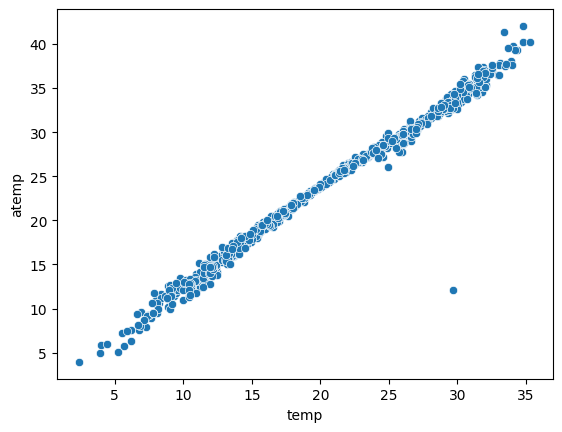

In [181]:
# temp and atemp columns are highly correlated. we can drop one of them.
sns.scatterplot(x=bike_data.temp, y=bike_data.atemp)
plt.show()

In [182]:
#deleting atemp column
bike_data.drop(["atemp"], axis=1, inplace=True)

In [183]:
# As cnt is target varible and sum pf registered and causul is cnt. So we can delete registered and causul column
bike_data.drop(["casual", "registered"], axis=1, inplace=True)

In [184]:
# we have yr(Year) and mnth(month) columns. Se we can delete dteday(date) column
bike_data.drop(["dteday"], axis=1, inplace=True)

In [185]:
bike_data.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,sunday,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,saturday,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,monday,clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,tuesday,clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,wednesday,clear,9.305237,43.6957,12.522300,1600


### EDA (Exploratory Aata Analysis)

#### Bivariant analysis of Categorical variables

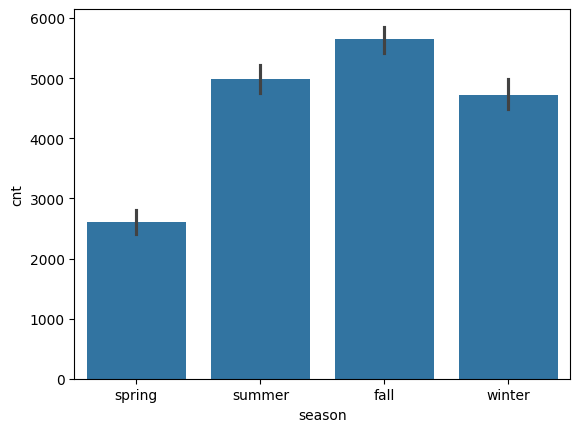

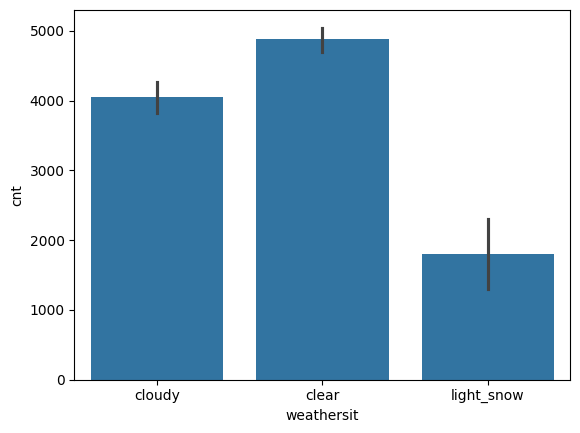

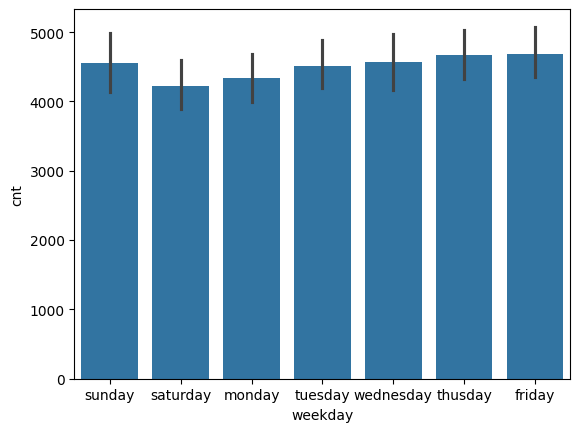

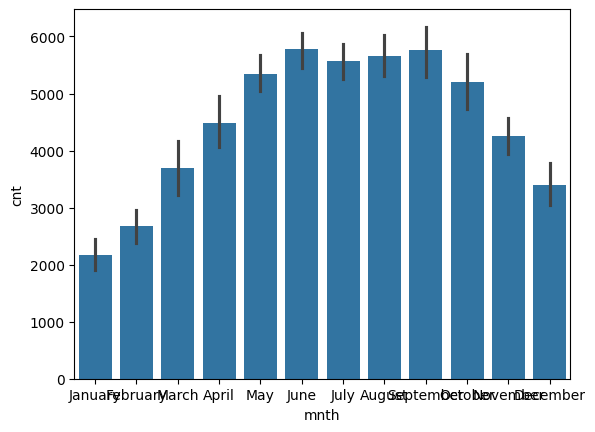

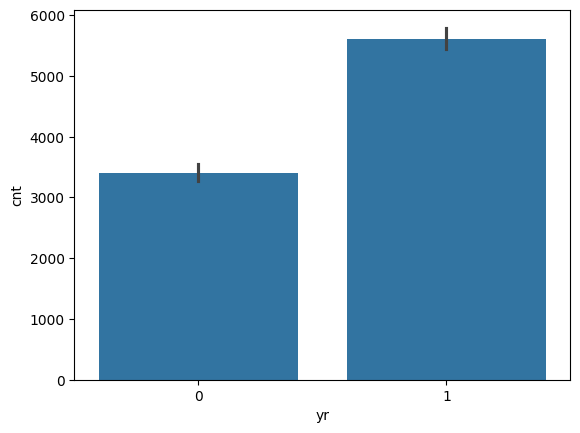

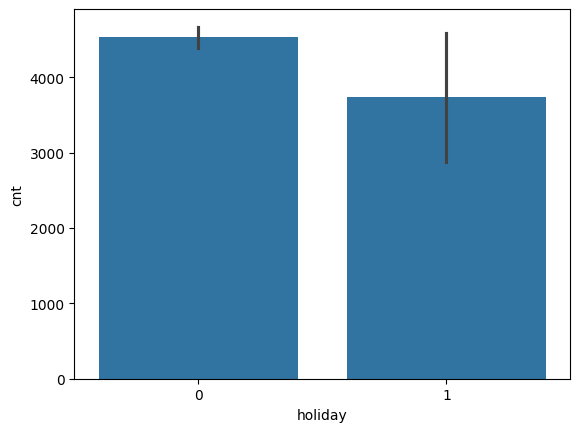

In [186]:
for col in ["season", "weathersit", "weekday", "mnth", "yr", "holiday"]:
    sns.barplot(x=col, y="cnt", data=bike_data)
    plt.show()

#### Bivariant analysis of numerical variables

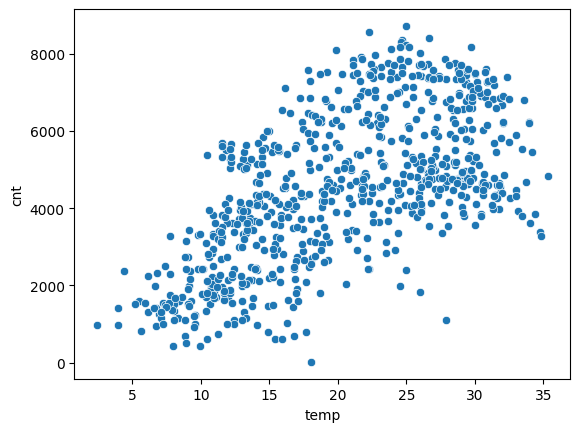

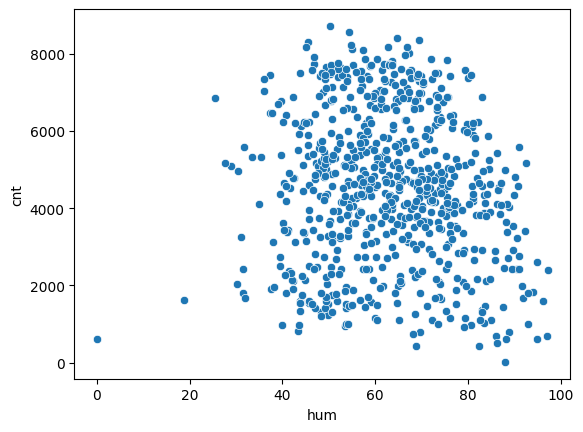

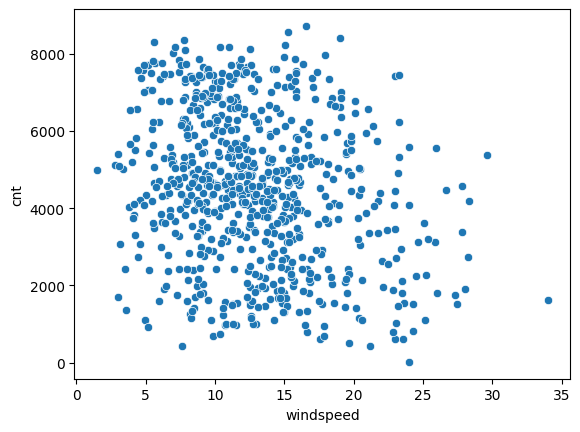

In [187]:
for col in ["temp", "hum", "windspeed"]:
    sns.scatterplot(x=col, y="cnt", data=bike_data)
    plt.show()

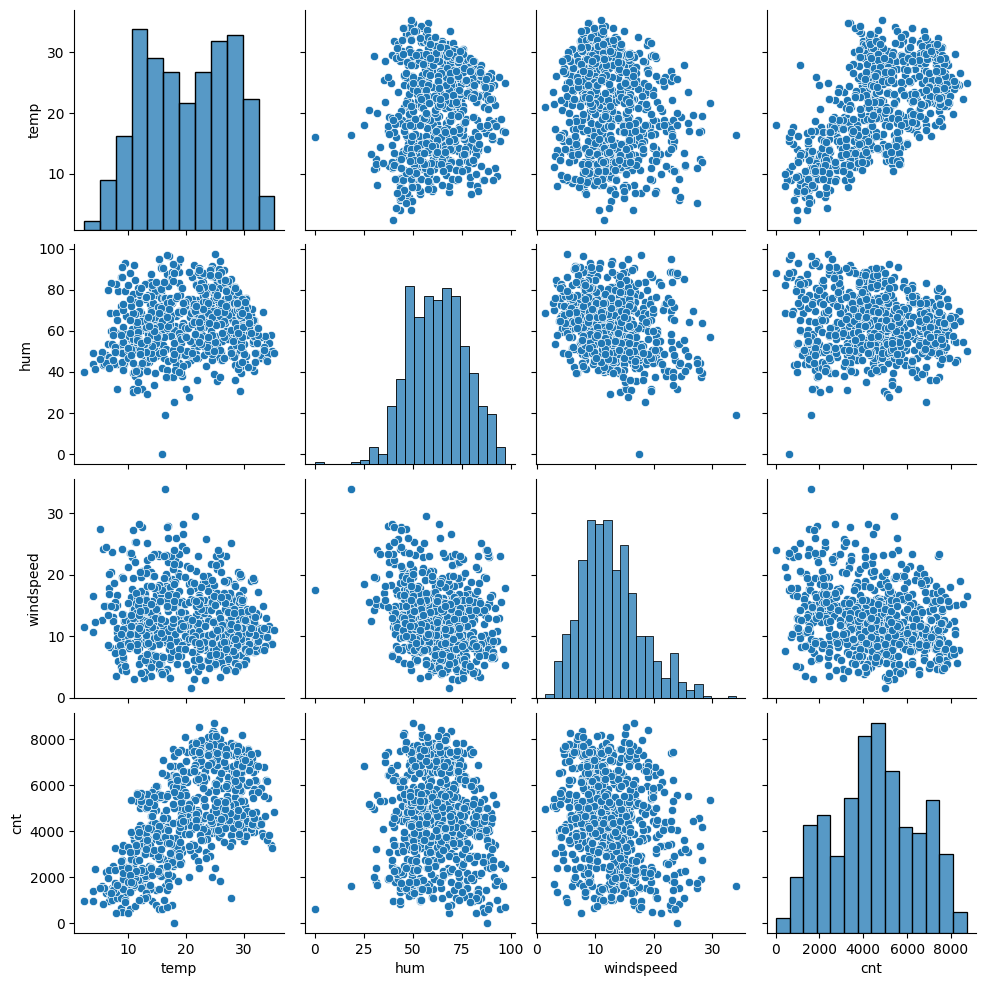

In [188]:
sns.pairplot(bike_data[["temp", "hum", "windspeed", "cnt"]])

#### Multi variant analysis of numerical variables

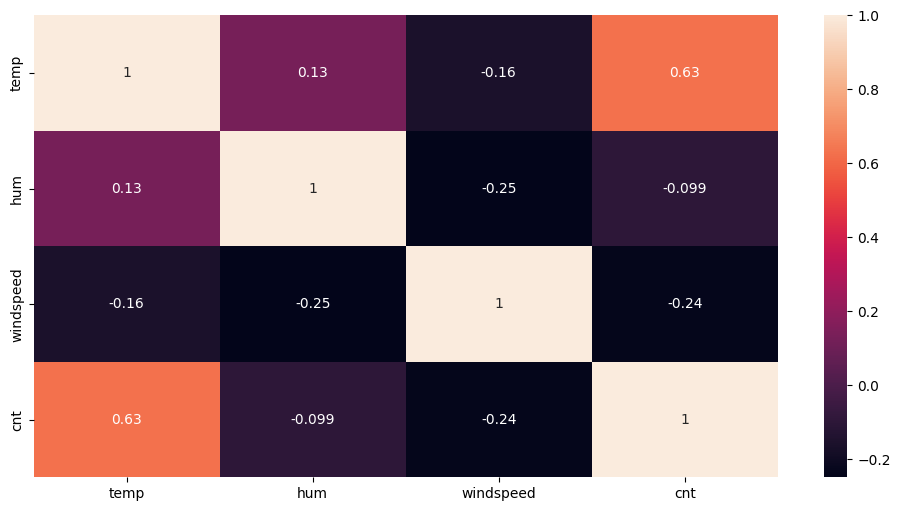

In [189]:
plt.figure(figsize=(12,6))
sns.heatmap(bike_data[["temp", "hum", "windspeed", "cnt"]].corr(), annot=True)
plt.show()

**Conclusion**: 
1) In Numerical variables, temp and windspeed has high correlation with cnt.
2) In categorical variables, has correlation in following order.
   1) yr
   2) season
   3) mnth
   4) holiday
   5) weathersit
   6) weekday
3) categorical variable weekday shows almost flat trend so we can drop that column as it has very low correlation with cnt

In [190]:
bike_data.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,sunday,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,saturday,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,monday,clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,tuesday,clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,wednesday,clear,9.305237,43.6957,12.522300,1600


### User defined function for code reusability

In [191]:
def ceateDummies(column, data_df):
    """
    Return Dataframe with dummy variables and categorcal variables 
    got deleted after converting to dummy variables.

    This function converts list of categorical varibales to dummy 
    variables.

    @type column: list
    @param column: List of columns.
    @type  data_df: Dataframe
    @param data_df: Dataframe with categorical variables.
    @return: Dataframe with dummy variables.
    """
    dumies = pd.get_dummies(data_df[column], drop_first = True)
    data_df = pd.concat([data_df, dumies], axis=1)
    data_df.drop([column], axis=1, inplace=True)

    return data_df

In [192]:
def getVif(X_df):
    """
    Return Dataframe with feature and vif column.

    This function will get selected column's VIF.

    @type X_df: Dataframe
    @param X_df: List of selected columns.
    @return: Dataframe with feature and vif column.
    """
    vif = pd.DataFrame()
    X = X_df.loc[:, X_df.columns != 'const']
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    return vif

In [193]:
def getOLSAndLm(X_df_rfe, y_df):
    """
    Return List with predictor dataframe with contants at 0th index and 
    trained linear model at 1st index.

    @type X_df_rfe: Dataframe
    @param X_df_rfe: Dataframe of predictor variables.
    @type y_df: List
    @param y_df: List of traget variable.
    @return: List with predictor dataframe with contants at 0th index and 
    trained linear model at 1st index.
    """
    # Adding a constant variable 
    X_df_lm = sm.add_constant(X_df_rfe)
    lm = sm.OLS(y_df,X_df_lm).fit()
    
    return [ X_df_lm, lm ]

#### Dummy Variables

In [194]:
for column in ["season", "weathersit", "mnth", "weekday"]:  
    bike_data = ceateDummies(column, bike_data)

In [195]:
bike_data.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'cloudy', 'light_snow', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'monday', 'saturday', 'sunday', 'thusday', 'tuesday',
       'wednesday'],
      dtype='object')

#### Splitting the Data into Training and Testing Sets

In [196]:
bike_data_train, bike_data_test = train_test_split(bike_data, random_state=100, train_size=0.7)

#### Rescaling the Features

In [197]:
scaler = MinMaxScaler()

bike_data_train[bike_data_train.columns] = scaler.fit_transform(bike_data_train)

In [198]:
bike_data_train.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,cloudy,...,May,November,October,September,monday,saturday,sunday,thusday,tuesday,wednesday
576,1.0,0.0,0.815169,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
426,1.0,0.0,0.442393,0.640189,0.255342,0.465255,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
728,1.0,0.0,0.245101,0.498067,0.663106,0.204096,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.395666,0.504508,0.188475,0.482973,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
111,0.0,0.0,0.345824,0.751824,0.380981,0.191095,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dividing into X_bike_train and y_bike_train sets for the model building

In [199]:
y_bike_train = bike_data_train.pop('cnt')
X_bike_train = bike_data_train

In [200]:
X_bike_train.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'cloudy', 'light_snow', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'monday', 'saturday', 'sunday', 'thusday', 'tuesday',
       'wednesday'],
      dtype='object')

#### Building model

1) **Models with all selected column**

In [201]:
[X_bike_train_lm, lm] = getOLSAndLm(X_bike_train, y_bike_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.00e-181
Time:                        19:45:26   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3393      0.044      7.694      0.000       0.253       0.426
yr             0.2324      0.008     28.819      0.000       0.217       0.248
holiday       -0.0861      0.027     -3.234      0.001      -0.138      -0.034
temp           0.4454      0.046      9.628      0.000       0.354       0.536
hum           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring        -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer         0.0430      0.026      1.645      0.101      -0.008       0.094
winter         0.1076      0.028      3.853      0.000       0.053       0.163
cloudy        -0.0596      0.010     -5.709      0.000      -0.080      -0.039
light_snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
August         0.0204      0.034      0.607      0.544      -0.046       0.086
December      -0.0443      0.034     -1.317      0.189      -0.110       0.022
February      -0.0324      0.033     -0.985      0.325      -0.097       0.032
January       -0.0633      0.034     -1.885      0.060      -0.129       0.003
July          -0.0338      0.035     -0.969      0.333      -0.102       0.035
June           0.0046      0.025      0.186      0.853      -0.044       0.053
March          0.0013      0.025      0.052      0.959      -0.047       0.050
May            0.0247      0.021      1.173      0.241      -0.017       0.066
November      -0.0399      0.036     -1.096      0.274      -0.111       0.032
October        0.0075      0.036      0.210      0.834      -0.063       0.078
September      0.0859      0.032      2.692      0.007       0.023       0.149
monday        -0.0209      0.015     -1.365      0.173      -0.051       0.009
saturday      -0.0548      0.015     -3.588      0.000      -0.085      -0.025
sunday        -0.0006      0.015     -0.042      0.967      -0.030       0.029
thusday       -0.0091      0.016     -0.588      0.557      -0.040       0.021
tuesday       -0.0179      0.016     -1.156      0.248      -0.048       0.013
wednesday     -0.0055      0.015     -0.368      0.713      -0.035       0.024
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) **Models with 10 most correlated columns target variable. We will use RFE for selecting columns**

In [202]:
lm = LinearRegression()
lm.fit(X=X_bike_train, y=y_bike_train)

LinearRegression()

In [203]:
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_bike_train, y_bike_train)

In [204]:
list(zip(X_bike_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('cloudy', False, 3),
 ('light_snow', True, 1),
 ('August', False, 10),
 ('December', False, 7),
 ('February', False, 8),
 ('January', False, 5),
 ('July', True, 1),
 ('June', False, 16),
 ('March', False, 17),
 ('May', False, 9),
 ('November', False, 6),
 ('October', False, 14),
 ('September', True, 1),
 ('monday', False, 11),
 ('saturday', False, 4),
 ('sunday', False, 18),
 ('thusday', False, 13),
 ('tuesday', False, 12),
 ('wednesday', False, 15)]

In [205]:
col = X_bike_train.columns[rfe.support_]
X_bike_train_rfe = X_bike_train[col]

In [206]:
X_bike_train_rfe.head()

,yr,holiday,temp,hum,windspeed,summer,winter,light_snow,July,September
576,1.0,0.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,1.0,0.0
426,1.0,0.0,0.442393,0.640189,0.255342,0.0,0.0,0.0,0.0,0.0
728,1.0,0.0,0.245101,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.395666,0.504508,0.188475,1.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.345824,0.751824,0.380981,1.0,0.0,0.0,0.0,0.0


In [207]:
[X_bike_train_lm, lm] = getOLSAndLm(X_bike_train_rfe, y_bike_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.79e-186
Time:                        19:45:27   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.000       0.217       0.319
yr             0.2259      0.008     27.118      0.000       0.210       0.242
holiday       -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp           0.6200      0.023     27.492      0.000       0.576       0.664
hum           -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed     -0.2059      0.026     -7.889      0.000      -0.257      -0.155
summer         0.0800      0.011      7.281      0.000       0.058       0.102
winter         0.1390      0.011     12.903      0.000       0.118       0.160
light_snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
July          -0.0482      0.018     -2.606      0.009      -0.085      -0.012
September      0.0944      0.016      5.724      0.000       0.062       0.127
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
getVif(X_bike_train_rfe)

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,summer,1.76
6,winter,1.68
8,July,1.55
9,September,1.29
7,light_snow,1.09
1,holiday,1.04


3) **In above model, "hum" column is has vif value greated then 5. Which means it has high correlation with predicting varaibles. So we can re-model after deleting the column.**

In [209]:
# Deleting "hum" as VIF value is greater the 5
X_bike_train_rfe.drop(["hum"], axis=1, inplace=True)

In [210]:
[X_bike_train_lm, lm] = getOLSAndLm(X_bike_train_rfe, y_bike_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.42e-171
Time:                        19:45:27   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.018      4.794      0.000       0.050       0.118
yr             0.2329      0.009     26.061      0.000       0.215       0.251
holiday       -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp           0.5854      0.024     24.438      0.000       0.538       0.632
windspeed     -0.1459      0.027     -5.365      0.000      -0.199      -0.092
summer         0.0750      0.012      6.346      0.000       0.052       0.098
winter         0.1228      0.011     10.731      0.000       0.100       0.145
light_snow    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
July          -0.0313      0.020     -1.578      0.115      -0.070       0.008
September      0.0822      0.018      4.640      0.000       0.047       0.117
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
getVif(X_bike_train_rfe)

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,summer,1.75
7,July,1.51
5,winter,1.43
8,September,1.28
6,light_snow,1.06
1,holiday,1.03


4) **In above model, "July" column is has p-value greater them 0.05. Which means it has very less correlation with target varible. So we can re-model after deleting the column.**

In [212]:
X_bike_train_rfe.drop(["July"], axis=1, inplace=True)

In [213]:
[X_bike_train_lm, lm] = getOLSAndLm(X_bike_train_rfe, y_bike_train)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          9.22e-172
Time:                        19:45:27   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.000       0.053       0.122
yr             0.2334      0.009     26.093      0.000       0.216       0.251
holiday       -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp           0.5682      0.021     26.580      0.000       0.526       0.610
windspeed     -0.1455      0.027     -5.340      0.000      -0.199      -0.092
summer         0.0812      0.011      7.256      0.000       0.059       0.103
winter         0.1261      0.011     11.179      0.000       0.104       0.148
light_snow    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
September      0.0895      0.017      5.229      0.000       0.056       0.123
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
getVif(X_bike_train_rfe)

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,summer,1.55
5,winter,1.34
7,September,1.20
6,light_snow,1.06
1,holiday,1.03


### Residual Analysis of the train data

In [215]:
y_bike_train_pred = lm.predict(X_bike_train_lm)

Text(0.5, 0, 'Errors')

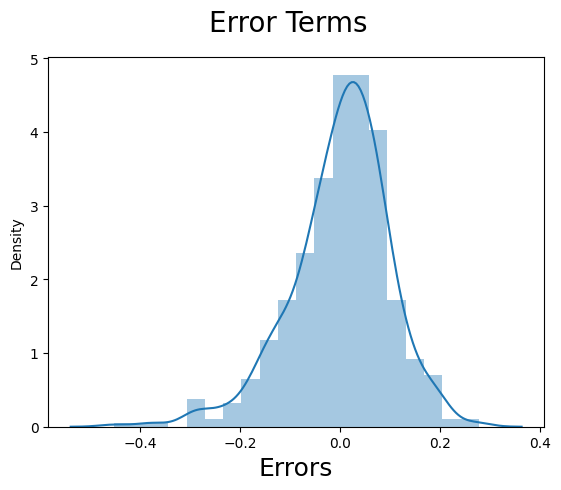

In [216]:
fig = plt.figure()
sns.distplot((y_bike_train - y_bike_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### Model Evaluation

In [217]:
cols = list(X_bike_train_rfe.columns)
cols

['yr',
 'holiday',
 'temp',
 'windspeed',
 'summer',
 'winter',
 'light_snow',
 'September']

In [218]:
bike_data_test[bike_data_test.columns] = scaler.transform(bike_data_test)
bike_data_test

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,cloudy,...,May,November,October,September,monday,saturday,sunday,thusday,tuesday,wednesday
184,0.0,1.0,0.831783,0.657364,0.084219,0.692706,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
535,1.0,0.0,0.901354,0.610133,0.153728,0.712034,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.0,0.0,0.511964,0.837699,0.334206,0.303382,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
221,0.0,0.0,0.881625,0.437098,0.339570,0.547400,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
152,0.0,0.0,0.817246,0.314298,0.537414,0.569029,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.519232,0.756118,0.283397,0.757478,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
127,0.0,0.0,0.584649,0.650923,0.069510,0.495973,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
640,1.0,0.0,0.745598,0.817947,0.052115,0.868615,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.0,0.0,0.331557,0.512107,0.203418,0.232858,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [219]:
y_bike_test = bike_data_test.pop('cnt')

# Creating X_bike_test dataframe by dropping variables from bike_data_test
X_bike_test = bike_data_test[cols]

In [220]:
# Adding a constant variable 
X_bike_test_lm = sm.add_constant(X_bike_test)

# Making predictions
y_bike_test_pred = lm.predict(X_bike_test_lm)

In [221]:
# R2 for train data
round(r2_score(y_true=y_bike_train, y_pred=y_bike_train_pred), 3)

0.804

In [222]:
# R2 for Test data
round(r2_score(y_true=y_bike_test, y_pred=y_bike_test_pred), 3)

0.772

In [223]:
# Difference in R2 value of train and test data
round(r2_score(y_true=y_bike_train, y_pred=y_bike_train_pred) - r2_score(y_true=y_bike_test, y_pred=y_bike_test_pred), 3)

0.032